In [10]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_16.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [11]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 

In [12]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]


In [13]:
def spl_smote(pos, subneg, p_test, y_test, 
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

    spline = mli.SplineCalib()
    spline.fit(probs, subgold)
    spline_test = spline.predict(p_test) 
    figure (figsize=(2.5,2.5))

    mli.plot_reliability_diagram(y_test,  spline_test)


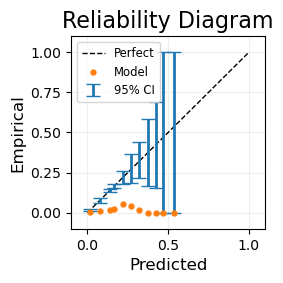

In [16]:
spl_smote(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=5)

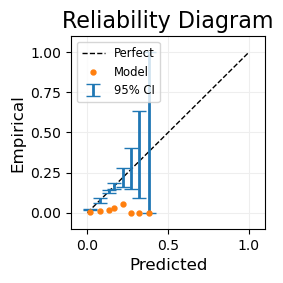

In [33]:
spl_smote(pos_2, subneg=np.random.choice(neg_2, 40*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=3.25)

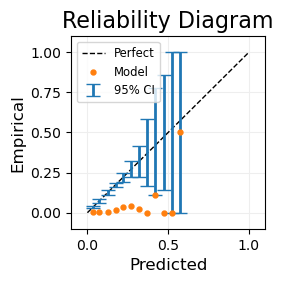

In [23]:
spl_smote(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=4.5)

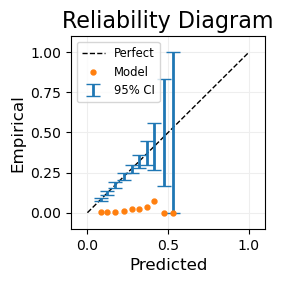

In [30]:
spl_smote(pos_4,  np.random.choice(neg_4, 40*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=7)

In [32]:
?mli.SplineCalib

Init signature:
mli.SplineCalib(
    method='L-BFGS-B',
    knot_sample_size=30,
    add_knots='auto',
    reg_param_vec='default',
    cv_spline=5,
    random_state=42,
    unity_prior=True,
    unity_prior_gridpts='default',
    unity_prior_weight=20,
    max_iter=1000,
    tol=0.0001,
    logodds_scale=True,
    logodds_eps='auto',
    reg_prec=4,
    force_knot_endpts=True,
    param_search_mode='fast',
)
Docstring:     
Probability calibration using cubic splines.

This defines a calibrator object.  The calibrator can be `fit` on 
model outputs and truth values.  After being fit, it can then be used to
`calibrate` model outputs.

This is similar to the sklearn fit/transform paradigm, except that it is 
intended for post-processing of model outputs rather than preprocessing 
of model inputs.

Parameters
----------

method : str, default is 'L-BFGS-B'
    Which optimization method to pass to scipy.optimize to solve the 
    penalized logistic regression optimization (spline fitting)

In [36]:
def spl_smote_Options(pos, subneg, p_test, y_test, 
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

    spline = mli.SplineCalib( knot_sample_size=10, cv_spline=5)
    spline.fit(probs, subgold)
    spline_test = spline.predict(p_test) 
    figure (figsize=(2.5,2.5))

    mli.plot_reliability_diagram(y_test,  spline_test)


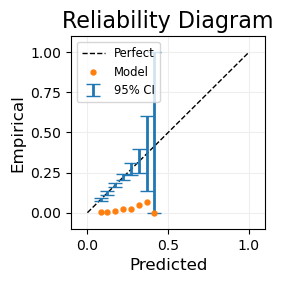

In [45]:
spl_smote_Options(pos_4,  np.random.choice(neg_4, 40*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=5.5)